In [47]:
%matplotlib notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from matplotlib import cm

# read sample data
data = pd.read_csv('Anne_20180113_2.csv', skiprows = 1)
data

,Map,MapID,Player,Date,Time spent (min),Stress (before),Stress (after),Heart rate (before),Heart rate (after),Variance
0,Tropical_Jungle_1,1,Anne07,2018-01-07,4.54,L,L,84.932195,85.091834,0.159639
1,Tropical_Jungle_2,1,Anne07,2017-12-17,1.83,L,L,98.755273,83.864416,-14.890857
2,Tropical_Jungle_3,1,Anne07,2018-01-04,4.12,L,L,91.661338,85.793590,-5.867748
3,Tropical_Jungle_4,1,Anne07,2017-12-29,1.09,M,L,109.023441,86.423256,-22.600184
4,Tropical_Jungle_5,1,Anne07,2018-01-08,3.26,L,L,83.736817,92.162952,8.426135
5,Tropical_Jungle_1,1,Anne07,2018-01-07,1.18,L,L,89.309811,82.341937,-6.967874
6,Tropical_Jungle_2,1,Anne07,2018-01-05,1.53,L,L,81.514252,81.721992,0.207740
7,Tropical_Jungle_3,1,Anne07,2017-12-18,1.81,L,L,93.953958,83.882766,-10.071191
8,Tropical_Jungle_4,1,Anne07,2017-12-15,3.75,L,L,91.399895,88.735379,-2.664516
9,Tropical_Jungle_5,1,Anne07,2017-12-28,1.35,L,L,87.576632,87.116986,-0.459647


<IPython.core.display.Javascript object>


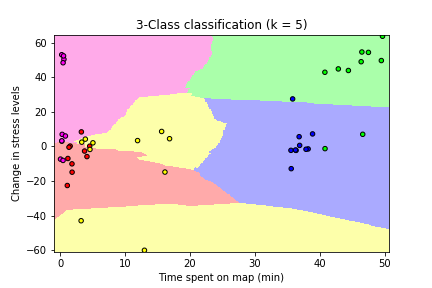

In [49]:
X = data[['Time spent (min)', 'Variance']]
y = data['MapID']

# KNN
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X,y)

# To plot classification boundaries

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#ffaae9','#fdffaa'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#ff00f2','#ffff00'])

# step size for meshgrid
h = 0.2
x1_min, x1_max = X['Time spent (min)'].min() - 1, X['Time spent (min)'].max() + 1
x2_min, x2_max = X['Variance'].min() - 1, X['Variance'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf.predict([a for a in zip(xx.ravel(), yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# arguments c and cmap goes together
plt.scatter(X['Time spent (min)'], X['Variance'], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))
ax.set_xlabel('Time spent on map (min)')
ax.set_ylabel('Change in stress levels')

plt.show()